# Read data

In [1]:
# read in the data
import pandas as pd

benithic = pd.read_csv('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_benthic_O18.tab', delimiter='\t', skiprows=29, header=0)
plank=pd.read_csv('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_G_bulloides.tab', delimiter='\t', skiprows=30, header=0)

In [2]:
# only take the specified columns
benithic=benithic[['Age [ka BP] (Hybrid Age)','δ18O [‰] (mixed species corrected to Uv...)']]
benithic.rename(columns={'Age [ka BP] (Hybrid Age)':'age', 'δ18O [‰] (mixed species corrected to Uv...)':'d18O'}, inplace=True)
plank=plank[['Age [ka BP] (Hybrid Age)','G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)','G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)']]
plank.rename(columns={'Age [ka BP] (Hybrid Age)':'age', 'G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d18O', 'G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d13C'}, inplace=True)

In [3]:
benithic

,age,d18O
0,0.14,3.360
1,0.28,3.245
2,0.42,3.270
3,0.56,3.240
4,0.70,3.170
...,...,...
8840,1430.40,3.510
8841,1430.50,3.480
8842,1430.70,3.480
8843,1430.80,3.330


In [4]:
plank

,age,d18O,d13C
0,0.00,0.47,-0.57
1,0.12,0.26,-0.66
2,0.15,0.44,-0.48
3,0.18,0.44,-0.73
4,0.26,0.48,-0.65
...,...,...,...
8720,1430.40,0.48,-0.84
8721,1430.50,0.25,-1.00
8722,1430.70,0.36,-0.81
8723,1430.80,0.35,-0.65


# Clean data and crop the data for past 800 kyr

In [12]:
# get columns from the benithic data and put it into a ndarray
import numpy as np
beni=np.array(benithic[['age','d18O']])
pla=np.array(plank[['age','d18O']])
print('shape of benithic data:', beni.shape)
print('shape of plank data:', pla.shape)

# remove rows with nan
beni=beni[~np.isnan(beni).any(axis=1)]
pla=pla[~np.isnan(pla).any(axis=1)]
print('shape of benithic data after removing nan:', beni.shape)
print('shape of plank data after removing nan:', pla.shape)

# crop the data for age<=800
beni=beni[beni[:,0]<=800]
pla=pla[pla[:,0]<=800]
print('shape of benithic data after cropping:', beni.shape)
print('shape of plank data after cropping:', pla.shape)


shape of benithic data: (8845, 2)
shape of plank data: (8725, 2)
shape of benithic data after removing nan: (8845, 2)
shape of plank data after removing nan: (8724, 2)
shape of benithic data after cropping: (4316, 2)
shape of plank data after cropping: (4432, 2)


Text(0.5, 1.0, 'Benithic and Plank d18O, croped, not interpolated')

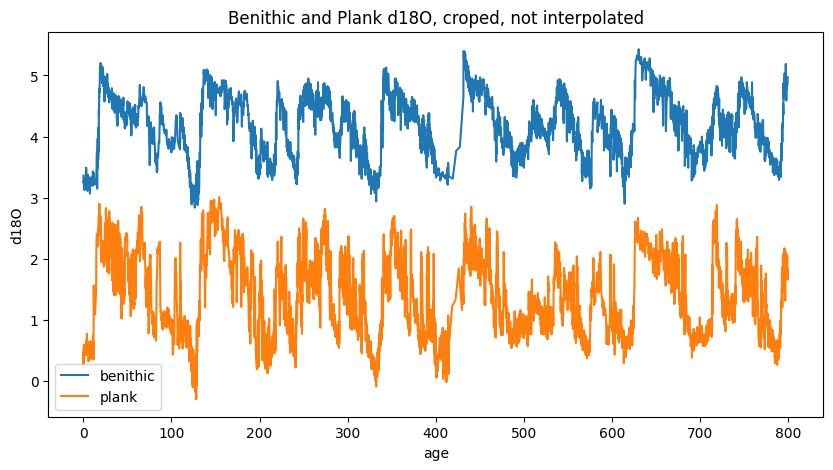

In [16]:
# plot line plots of the data in the same figure
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(beni[:,0], beni[:,1], label='benithic')
plt.plot(pla[:,0], pla[:,1], label='plank')
plt.legend()
plt.xlabel('age')
plt.ylabel('d18O')
plt.title('Benithic and Plank d18O, croped, not interpolated') 

# Check the data temporal resolution

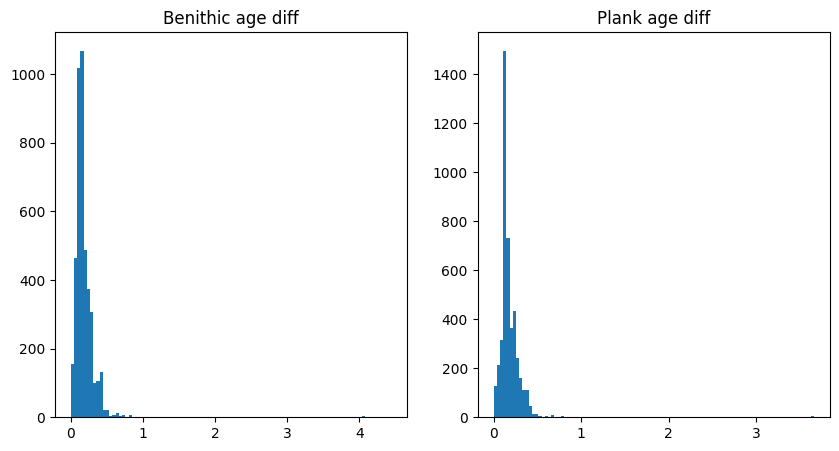

In [17]:
# calculate the diff of the first column of beni and pla
beni_age_diff=np.diff(beni[:,0])
pla_age_diff=np.diff(pla[:,0])

# plot the histogram of the diff side by side
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(beni_age_diff, bins=100)
plt.title('Benithic age diff')
plt.subplot(1,2,2)
plt.hist(pla_age_diff, bins=100)
plt.title('Plank age diff')
plt.show()

# Interpolate data

Text(0.5, 1.0, 'Benithic and Plank d18O, interpolated')

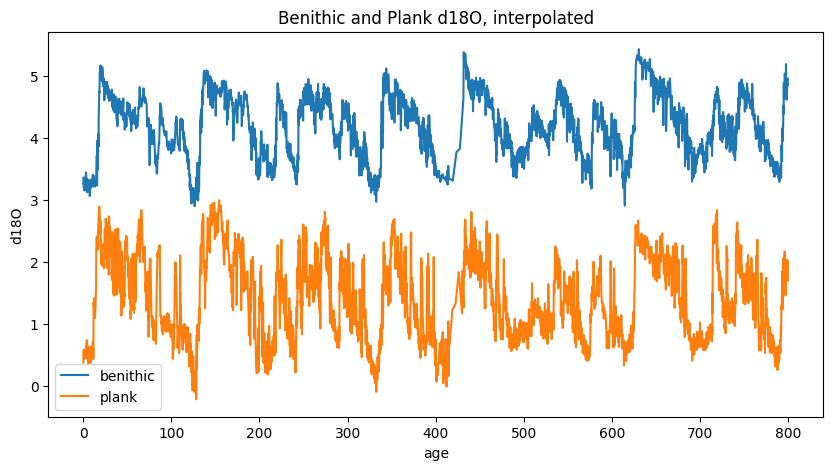

In [20]:
# interpolate the data with gap of 0.1
from scipy.interpolate import interp1d

# create a common age array that depends on the min and max of the two data
age_min=max(beni[0,0], pla[0,0])
age_max=min(beni[-1,0], pla[-1,0])
age_common=np.arange(age_min, age_max, 0.1)

# interpolate the data with the common age array
f_beni=interp1d(beni[:,0], beni[:,1])
f_pla=interp1d(pla[:,0], pla[:,1])
beni_interp=f_beni(age_common)
pla_interp=f_pla(age_common)

# plot the interpolated data
fig=plt.figure(figsize=(10,5))
plt.plot(age_common, beni_interp, label='benithic')
plt.plot(age_common, pla_interp, label='plank')
plt.legend()
plt.xlabel('age')
plt.ylabel('d18O')
plt.title('Benithic and Plank d18O, interpolated')


In [22]:
beni_interp.shape

(7997,)

# Doing PCA

In [24]:
import numpy as np
from sklearn.decomposition import PCA


# Combining the arrays into a 2D array
data = np.vstack([beni_interp, pla_interp]).T

# Performing PCA
pca = PCA(n_components=2)
pca.fit(data)
pcs=pca.transform(data)

# Extracting explained variance and the shape of EOFs and PCs
explained_variance = pca.explained_variance_ratio_
EOFs_shape = pca.components_.shape
PCs_shape = pcs.shape


print('explained_variance:', explained_variance)
print('EOFs_shape:', EOFs_shape)
print('PCs_shape:', PCs_shape)



explained_variance: [0.8901667 0.1098333]
EOFs_shape: (2, 2)
PCs_shape: (7997, 2)


In [31]:
pca.components_

array([[-0.58737208, -0.80931702],
       [-0.80931702,  0.58737208]])

Text(0, 0.5, 'PC')

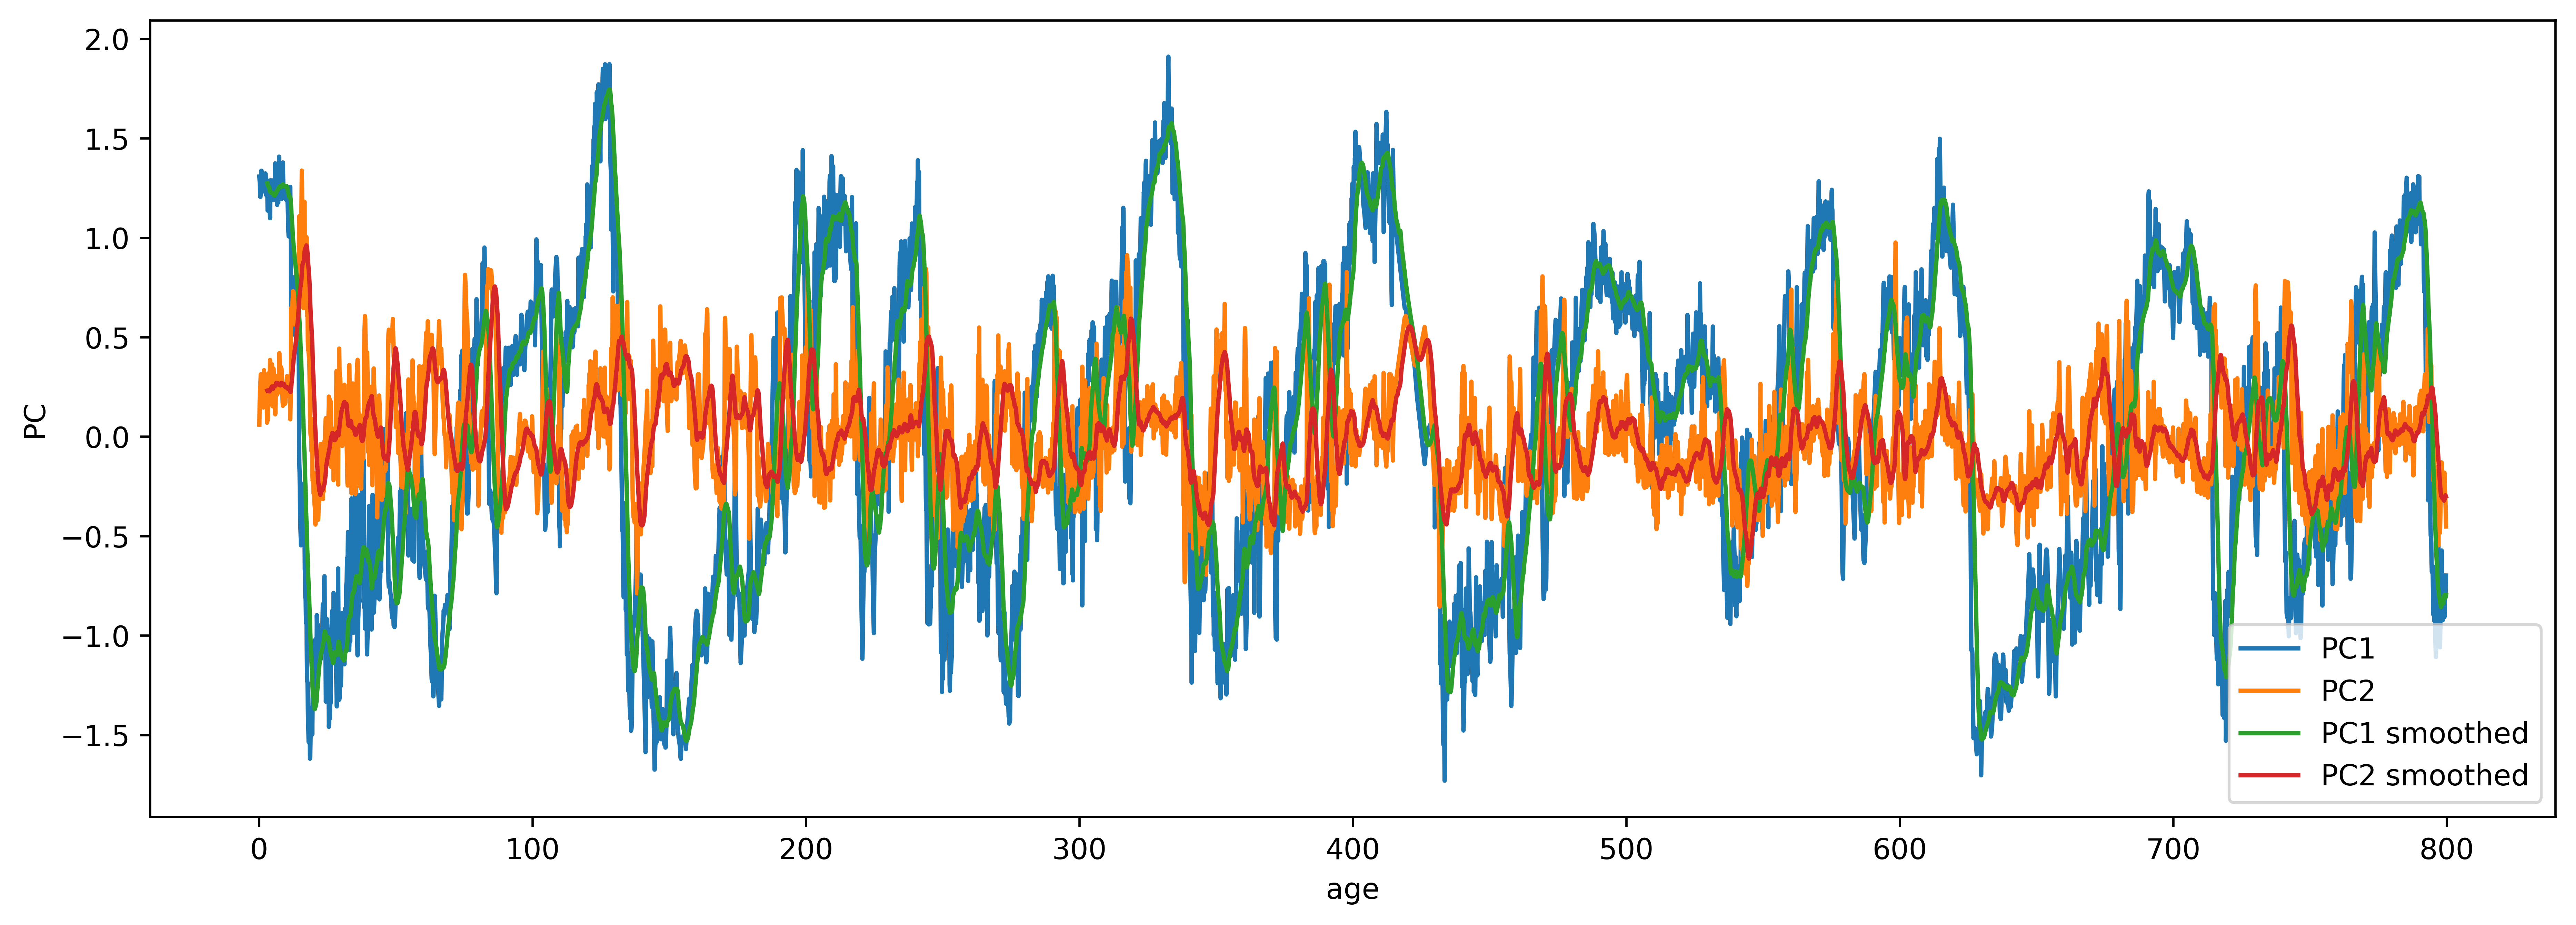

In [30]:
# plot the first two PCs
import matplotlib.pyplot as plt
age_min=max(beni[0,0], pla[0,0])
age_max=min(beni[-1,0], pla[-1,0])
age_common=np.arange(age_min, age_max, 0.1)

plt.figure(figsize=(15,5),dpi=600)
plt.plot(age_common, pcs[:,0], label='PC1')
plt.plot(age_common, pcs[:,1], label='PC2')
# plot the smoothed PC1 and PC2 with a window of 10 using rolling mean
plt.plot(age_common, pd.Series(pcs[:,0]).rolling(window=30).mean(), label='PC1 smoothed')
plt.plot(age_common, pd.Series(pcs[:,1]).rolling(window=30).mean(), label='PC2 smoothed')


plt.legend()
plt.xlabel('age')
plt.ylabel('PC')


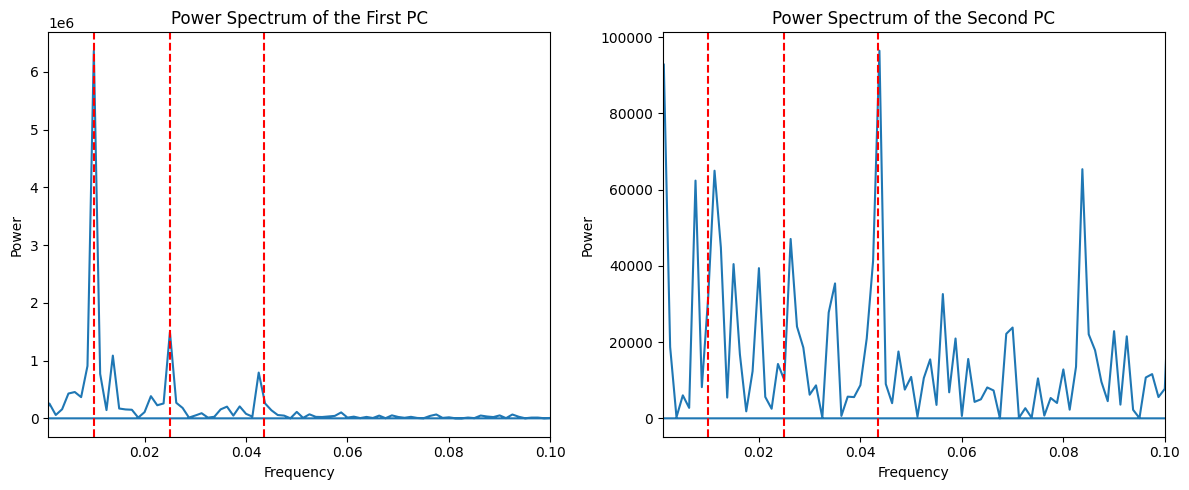

In [36]:
import matplotlib.pyplot as plt

# Given: time gap for the interpolated data is 0.1
time_gap = 0.1

# Calculating the frequencies for the power spectrum
frequencies = np.fft.fftfreq(pcs.shape[0], d=time_gap)

# Calculating the power spectrum for the first two principal components
power_spectrum_pc1 = np.abs(np.fft.fft(pcs[:, 0]))**2
power_spectrum_pc2 = np.abs(np.fft.fft(pcs[:, 1]))**2

# Frequencies for the vertical lines
freq_lines = [1/100, 1/23, 1/40]

# Plotting the power spectrum of the first two PCs side by side
plt.figure(figsize=(12, 5))

# Power spectrum of the first PC
plt.subplot(1, 2, 1)
plt.plot(frequencies, power_spectrum_pc1)
# set x limit to 0.001 to 0.5
plt.xlim(0.001, 0.1)
plt.title("Power Spectrum of the First PC")
plt.xlabel("Frequency")
plt.ylabel("Power")
for freq in freq_lines:
    plt.axvline(x=freq, color='r', linestyle='--')

# Power spectrum of the second PC
plt.subplot(1, 2, 2)
plt.plot(frequencies, power_spectrum_pc2)
# set x limit to 0.001 to 0.5
plt.xlim(0.001, 0.1)
plt.title("Power Spectrum of the Second PC")
plt.xlabel("Frequency")
plt.ylabel("Power")
for freq in freq_lines:
    plt.axvline(x=freq, color='r', linestyle='--')

plt.tight_layout()
plt.show()
